In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import dateutil.parser
from datetime import datetime


In [2]:
loans_data = pd.read_csv(r'C:\Users\user\Downloads\loans.csv')
loans_data

,id_number,loan_amount,lender_count,status,funded_date,funded_amount,repayment_term,location_country_code,sector,description,use
0,736066,4825,60,funded,2014-08-03T17:51:50Z,4825,8,BJ,Retail,NaN,NaN
1,743090,975,34,funded,2014-08-18T09:10:54Z,975,12,BJ,Food,NaN,NaN
2,743120,950,25,funded,2014-08-09T17:46:35Z,950,14,BJ,Services,NaN,NaN
3,743121,825,28,funded,2014-08-24T17:00:38Z,825,14,BJ,Retail,NaN,NaN
4,743124,725,21,funded,2014-08-25T03:24:54Z,725,13,BJ,Retail,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6014,1568871,200,8,funded,2018-07-19T15:14:35Z,200,14,ZW,Food,Sethukelo is a 19-year-old entrepreneur who li...,to purchase goods for starting a grocery store.
6015,1568880,200,8,funded,2018-07-19T19:22:43Z,200,14,ZW,Food,Hlanjiwe is a 20-year-old entrepreneur who liv...,to buy grocery goods for her business.
6016,1568883,200,6,funded,2018-07-19T20:18:53Z,200,14,ZW,Clothing,Lebuhani is a 21-year-old entrepreneur who liv...,to buy clothes for her business.
6017,1568887,200,8,funded,2018-07-18T23:38:44Z,200,14,ZW,Food,Jacqueline is a 23-year-old entrepreneur who l...,her to buy goods to sell in her store.


In [3]:
loans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id_number              6019 non-null   int64 
 1   loan_amount            6019 non-null   int64 
 2   lender_count           6019 non-null   int64 
 3   status                 6019 non-null   object
 4   funded_date            5082 non-null   object
 5   funded_amount          6019 non-null   int64 
 6   repayment_term         6019 non-null   int64 
 7   location_country_code  6002 non-null   object
 8   sector                 6019 non-null   object
 9   description            5677 non-null   object
 10  use                    5677 non-null   object
dtypes: int64(5), object(6)
memory usage: 517.4+ KB


to start visualizing our data, we create a scatter plot to see if there's correlation between the repayment term and loan amount

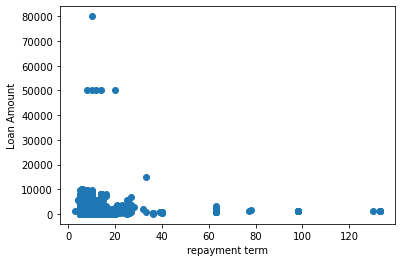

In [4]:
plt.scatter(x = loans_data['repayment_term'], y = loans_data['loan_amount'])
plt.xlabel('repayment term')
plt.ylabel('Loan Amount')
plt.show()

this graph doesn't quite tell us if there is a relationship between the two parameter.

We can also check the distribution of our data by using a histogram

<function matplotlib.pyplot.show(close=None, block=None)>

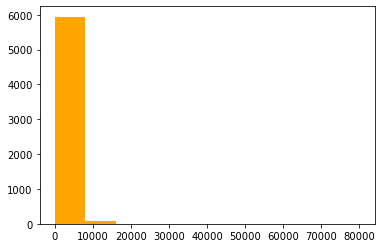

In [6]:
plt.hist(loans_data['loan_amount'], color ='orange')
plt.show

from this histogram we can tell that more loan amount less than 10000 was collected

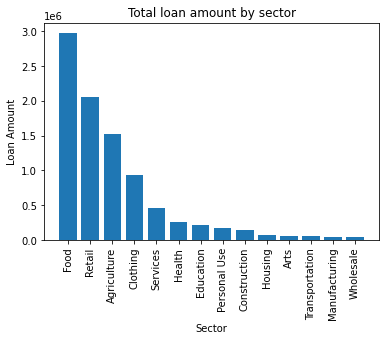

In [8]:
AD = loans_data.groupby('sector')['loan_amount'].sum().sort_values(ascending = False)
AD
plt.bar(x = AD.index, height = AD.values)
plt.xlabel('Sector')
plt.ylabel('Loan Amount')
plt.title('Total loan amount by sector')
plt.xticks(rotation = 90)
plt.show()

From this barchat we can see that the food sector took more loan than the other sector

let us plot another barchat that shows the average loan amount for each sector

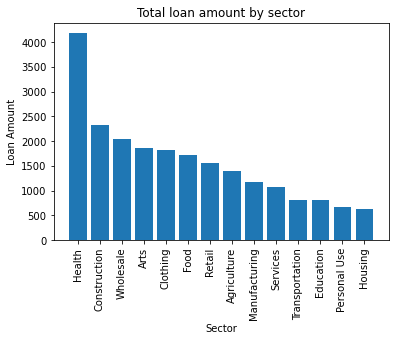

In [11]:
AS = loans_data.groupby('sector')['loan_amount'].mean().sort_values(ascending = False)
AS
plt.bar(x = AS.index, height = AS.values)
plt.xlabel('Sector')
plt.ylabel('Loan Amount')
plt.title('Total loan amount by sector')
plt.xticks(rotation = 90)
plt.show()

look at this! How is the sector with the highest average loan amount health when the sector with the highest total loan is food? what does this tell us? let us plot a boxplot of the loan amoount of the health sector to get more insight

Text(0, 0.5, 'Loan amount')

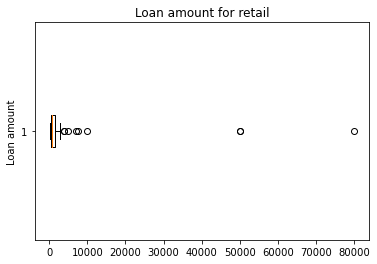

In [12]:
sector = 'Health'
df_sector = loans_data[loans_data.sector == sector]
df_amount = df_sector.loan_amount
plt.boxplot(df_amount, vert = False)
plt.title('Loan amount for retail')
plt.ylabel('Loan amount')

YES! this boxplot is showing us that they are outliers in the loan amounts of the health sector. This is the reason for the spike of the average loan of the sector